In [11]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [12]:
gld = pdr.get_data_yahoo('^NSEI')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,day,Open,High,Low,Close
Date,,,,,
2017-07-17,1,9908.150391,9928.200195,9894.700195,9915.950195
2017-07-18,2,9832.700195,9885.349609,9792.049805,9827.150391
2017-07-19,3,9855.950195,9905.049805,9851.650391,9899.599609
2017-07-20,4,9920.200195,9922.549805,9863.450195,9873.299805
2017-07-21,5,9899.599609,9924.700195,9838.000000,9915.250000


In [13]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2017-08-11,20,9712.150391,9771.650391,9685.549805,9710.799805,9972.361220,NaN
2017-08-14,21,9755.750000,9818.299805,9752.099609,9794.150391,9936.750109,9954.304827
2017-08-16,22,9825.849609,9903.950195,9773.849609,9897.299805,9916.283420,9953.416713
2017-08-17,23,9945.549805,9947.799805,9883.750000,9904.150391,9904.116753,9957.083380
2017-08-18,24,9865.950195,9865.950195,9783.650391,9837.400391,9878.672309,9954.121512
2017-08-21,25,9864.250000,9884.349609,9740.099609,9754.349609,9845.000000,9948.457217


In [14]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2017-08-14,21,9755.750000,9818.299805,9752.099609,9794.150391,9936.750109,9954.304827,-1
2017-08-16,22,9825.849609,9903.950195,9773.849609,9897.299805,9916.283420,9953.416713,-1
2017-08-17,23,9945.549805,9947.799805,9883.750000,9904.150391,9904.116753,9957.083380,-1
2017-08-18,24,9865.950195,9865.950195,9783.650391,9837.400391,9878.672309,9954.121512,-1
2017-08-21,25,9864.250000,9884.349609,9740.099609,9754.349609,9845.000000,9948.457217,-1


In [15]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-08-14,21,9755.750000,9818.299805,9752.099609,9794.150391,9936.750109,9954.304827,-1,NaN,NaN,NaN
2017-08-16,22,9825.849609,9903.950195,9773.849609,9897.299805,9916.283420,9953.416713,-1,0.010477,-0.010477,0.0
2017-08-17,23,9945.549805,9947.799805,9883.750000,9904.150391,9904.116753,9957.083380,-1,0.000692,-0.000692,0.0
2017-08-18,24,9865.950195,9865.950195,9783.650391,9837.400391,9878.672309,9954.121512,-1,-0.006762,0.006762,0.0
2017-08-21,25,9864.250000,9884.349609,9740.099609,9754.349609,9845.000000,9948.457217,-1,-0.008478,0.008478,0.0


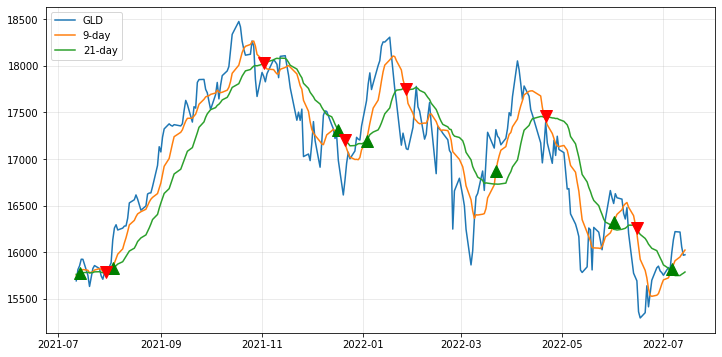

In [16]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

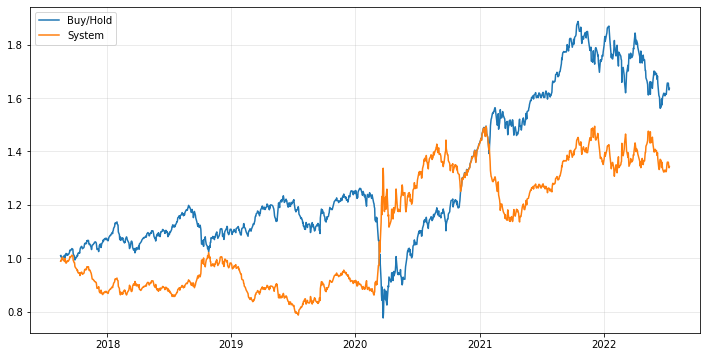

In [8]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
plt.legend(loc=2)
plt.grid(True, alpha=.3)

In [9]:
np.exp(gld['return']).cumprod()[-1] -1

0.6361450203954164

In [10]:
np.exp(gld['system_return']).cumprod()[-1] -1

0.34376461456560925